# Лабораторная работа №7
## Деревья решений

1.	Вы работаете с файлом winequality-red.csv. Целевая переменная – quality.
2.	Выполните предобработку данных при необходимости.
3.	Выполните машинное обучение по модели деревьев решений.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('winequality-red.csv', delimiter  = ';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


Как видно из info датасет не требует дополнительной переработки данных. Нет ни пропусков, ни категориальных признаков, можно приступать к работе.
Для того, чтобы выполнить машинное обучение необходимо выделить целевой признак.

In [4]:
data = df.drop('quality', axis=1)
y = df['quality'].astype('int') # это и есть наш target 

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report 

model_forest = RandomForestClassifier()
model_forest.fit(data, y)
predict_forest = model_forest.predict(data)

print('accuracy', accuracy_score(y, predict_forest))
print(classification_report(y, predict_forest))

accuracy 0.9831144465290806
             precision    recall  f1-score   support

          3       1.00      0.90      0.95        10
          4       0.98      0.96      0.97        53
          5       0.98      1.00      0.99       681
          6       0.99      0.97      0.98       638
          7       0.99      0.97      0.98       199
          8       1.00      1.00      1.00        18

avg / total       0.98      0.98      0.98      1599



Я бы сказала что модель скорее всего переучена, так как слишкм высокое начение для метрик

In [6]:
try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

try:
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import StratifiedKFold

4.	Исследуйте влияние глубины дерева на модель, используя 5-fold кросс-валидацию в диапазоне от 1 до 15. Особое внимание уделите подбору метрики.

In [7]:
array = ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
work = []
notwork = []
for i in array:
    try:
        train_scores, valid_scores = validation_curve(model, data, y, 
                                              'max_depth', range(1, 15),
                                         cv=cv, scoring=i)
        work.append(i)
    except:
        notwork.append(i)

При помощи цикла мы узнали, какие метрики рабочие и можем их применять в дальшейшем анализе.

In [8]:
print(work)

[]


In [9]:
print(notwork)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


5.	Постройте графики сравнения результатов на обучающем и тестовом множестве с указанием метрики. Необходимо подобрать хотя бы две различные метрики.

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=123)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=132)

train_scores, valid_scores = validation_curve(model, data, y, 
                                              'max_depth', range(1, 15),
                                              cv=cv, scoring='accuracy')

In [11]:
train_scores.shape

(14, 5)

In [12]:
valid_scores.shape

(14, 5)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.fill_between(range(1,15), train_score_mean-train_score_std, train_score_mean+train_score_std, color='b',
                 interpolate=True, alpha=0.5,)
plt.fill_between(range(1,15), valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r', 
                 interpolate=True, alpha=0.5)

plt.plot(range(1,15), train_score_mean, c='b', lw=2)
plt.plot(range(1,15), valid_scores_mean, c='r', lw=2)

plt.xlabel('max depth')
plt.ylabel('accuracy')

Text(0,0.5,'accuracy')

С увеличением глубины дерева значение метрики accuracy сильно растет в то время как валидационное значение остает примерно одинаковым, это значит что дерево быстро переобучается   

In [14]:
train_scores, valid_scores = validation_curve(model, data, y, 
                                              'max_depth', range(1, 15),
                                              cv=cv, scoring='neg_log_loss')

Text(0,0.5,'neg_log_loss')

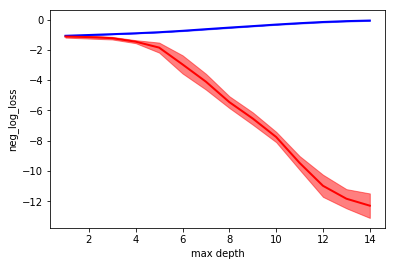

In [15]:
train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.fill_between(range(1,15), train_score_mean-train_score_std, train_score_mean+train_score_std, color='b',
                 interpolate=True, alpha=0.5,)
plt.fill_between(range(1,15), valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r', 
                 interpolate=True, alpha=0.5)

plt.plot(range(1,15), train_score_mean, c='b', lw=2)
plt.plot(range(1,15), valid_scores_mean, c='r', lw=2)

plt.xlabel('max depth')
plt.ylabel('neg_log_loss')


Разница в тренировочной и валидационной ошибке значительна. Это также можно объяснить переобучением модели с увеличеним глубины

6.	Выполните подбор гиперпараметров по методу случайного перебора (Random Search). В пространство поиска включите следующие параметры: критерий, максимальная глубина, минимальное число объектов в листе, вес класса и минимальное количество объектов, необходимое для разделения внутреннего узла. Количество запусков не менее 200.

In [16]:
from scipy.stats import randint as randint
from scipy.stats import uniform
try:
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import RandomizedSearchCV
    from sklearn.cross_validation import StratifiedKFold

RND_SEED = 123

In [17]:
%%time
# задаем сетку для подбора гиперпараметров
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 8),
    'min_samples_leaf': randint(1, 10),
    'class_weight': [None, 'balanced']}

# задаем количество fold-ов для кросс-валидации - в нашем случае 5
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
# объявляем классификатор
model = DecisionTreeClassifier(random_state=123)
# передаем сетку, классификатор и количество fold-ов в метод подбора параметров по сетке
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=200, n_jobs=-1,
                                   cv=cv, scoring='accuracy', random_state=123)
#запускаем подбор параметров по сетке на всей выборке
random_search.fit(data, y)

Wall time: 34.7 s


7.	Выведите параметры лучшей модели, наилучшее значение метрики и важность признаков.

In [18]:
#смотрим лучшие параметры и качество алгоритма на лучших параметрах
print(random_search.best_params_)
print(random_search.best_score_)

{'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4}
0.5891181988742964


In [19]:
best_model = random_search.best_estimator_;
best_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

Через 34 секунд узнаем, что лучшее качество в 58,91%  показывает алгоритм из 7 деревьев, для которых минимальное количество объектов в узле равно 4, по критерию Джини и без весов

In [21]:
# Возьмем лучшую модель и выведем важность признаков
imp = best_model.feature_importances_

Для каждого признака (с названием) получите его значение важности

In [22]:
pd.Series(index=df.columns[:-1], data = imp).sort_values()

density                 0.030189
fixed acidity           0.031865
citric acid             0.042526
chlorides               0.046840
free sulfur dioxide     0.049411
pH                      0.068083
residual sugar          0.074426
volatile acidity        0.082908
total sulfur dioxide    0.122170
sulphates               0.143130
alcohol                 0.308452
dtype: float64

Для пущей проверки
---
Все-таки стоит посмотреть результаты обучения на тестовой и тренировочной выборках

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)

In [24]:
model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7, min_samples_leaf= 4)
model.fit(X_train, y_train) 
predict_tree = model.predict(X_test)
print('accuracy', accuracy_score(y_test, predict_tree))

accuracy 0.5700757575757576


In [25]:
model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7, min_samples_leaf= 4)
model.fit(X_train, y_train) 
predict_tree = model.predict(X_train)
print('accuracy', accuracy_score(y_train, predict_tree))

accuracy 0.7563025210084033


In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(
    model,
    X_test,
    y_test,
    scoring='accuracy',
    cv=10
)

c:\python\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


array([0.54545455, 0.56363636, 0.51851852, 0.41509434, 0.47169811,
       0.66037736, 0.54716981, 0.50980392, 0.45098039, 0.5       ])

Вывод
---
В процессе работы мы смогли узнать как подобрать гиперпараметры для деева решений без глупого ручного перебора и обучили модель на всей выборке. Так же мы посмотрели как наша модель справляется на тестовых и тренировачных данных, результаты не сильно радостные, точность на тестовых данных ~60%, что очень близко к угадыванию.     Однако, цель лабораточной работы была вполнена - ***освоение метода машинного обучения - Дерево решений***